# Le pendule

!["Schema du Pendule"](SchemaPendule.png)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

## Approximation des petits angles

On considère le pendule simple de la figure ci-dessus, dont l'équation du mouvement libre s'écrit : 

$$ \frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\sin\theta=0 $$
et qui dans le cas des petits angles se simplifie :
$$\sin\theta\approx\theta\quad\Rightarrow\quad\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0
$$

où $\theta$ est l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide. On utilisera par commodité la valeur suivante : $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$. 

Résolvez cette équation linéarisée ($\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$) avec la méthode RK4 pour différentes valeurs de l'amortissement : $q=1$, $q=2$, $q=5\mathrm{~s^{-1}}$ et tracez **sur un même graphe** l'évolution de $\theta(t)$ dans ces régimes respectivement pseudo-périodique, critique et apériodique.

On prendra comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$.

In [29]:
#Valeurs d'amortissement
q = [1,2,5]

#Paramètres
Omega = 1 #rad.s-1

# Paramètres initiaux
theta_0=np.radians(10)
ordre = 2

In [30]:
# vecteur temps
ti = 0 # s
tf = 20 # s
step = 0.05 # s
t=np.arange(0, 20+step, step)

On transforme l'équation différentielle en une équation différentielle du premier ordre avec un changement de variables :
$$
\begin{cases}
u_0=\theta \\
u_1=\frac {d \theta}{dt}
\end{cases}
$$
On a donc:
$$
\frac{du_1}{dt}+ q u_1+u_0=0
$$

In [31]:
def derivee_u (u, t, q):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, -q*u1+ Omega**2*u0)
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)

    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] = -q*u[1] - Omega**2*u[0]

    return du

In [32]:
# Méthode rk4
def rk4(start, end, step, v_ini, derivee, ordre, q):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i], q)
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2, q)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2, q)
        d4 = derivee(v[:, i] + step * d3, t[i] + step, q)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

Valeurs initiales:
$$
u_0= 10°=\frac{\pi}{18} \text{rad}
$$

$$
u_1=0
$$

In [33]:
u_ini=np.array([theta_0, 0])
q = [1,2,5]

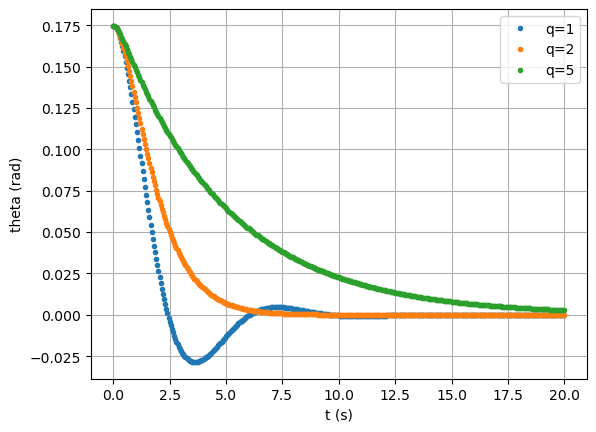

In [34]:
# Plot
## q
U=[]
for i in range(len(q)):
    t, urk4 = rk4(ti, tf, step, u_ini, derivee_u, ordre, q[i])
    U.append(urk4)

U = np.array(U)
for j in range(len(q)):
    plt.plot(t, U[j, 0, :], '.', label = f'q={q[j]}')

plt.xlabel("t (s)")
plt.ylabel("theta (rad)")
plt.grid()
plt.legend()
plt.show()

## Force d'excitation

On ajoute maintenant une force d'excitation au pendule de sorte que l'équation du mouvement s'écrive : 

$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t). $$

Résolvez cette nouvelle équation avec la méthode RK4 pour une force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$.

Tracez **sur un même graphe** la trajectoire dans l'espace des phase $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ pour le pendule libre ($q=0$ et $F_e=0$), amorti ($q=1$ et $F_e=0$), et amorti avec excitation ($q=1$ et $F_e=1$).

On prendra toujours comme conditions initiales $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$.

Commentez la forme des trajectoires que vous observez.

On transforme l'équation différentielle en une équation différentielle du premier ordre avec un changement de variables :
$$
\begin{cases}
u_0=\theta \\
u_1=\frac {d \theta}{dt}
\end{cases}
$$
On a donc:
$$
\frac{du_1}{dt}+ q u_1+\Omega^2u_0=F_e sin(\Omega_e t)
$$

In [35]:
# Paramètres
Omega_e = 2* Omega / 3   #rad.s-1

In [36]:
def derivee_u (u, t, q, F_e):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, -q*u1+ Omega**2*u0)
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)

    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] = -q*u[1] - Omega**2*u[0] + F_e*np.sin(Omega_e*t)

    return du

In [37]:
# Méthode rk4
def rk4(start, end, step, v_ini, derivee, ordre, q, F_e):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i], q, F_e)
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2, q, F_e)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2, q, F_e)
        d4 = derivee(v[:, i] + step * d3, t[i] + step, q, F_e)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

In [38]:
u_ini=np.array([theta_0, 0])

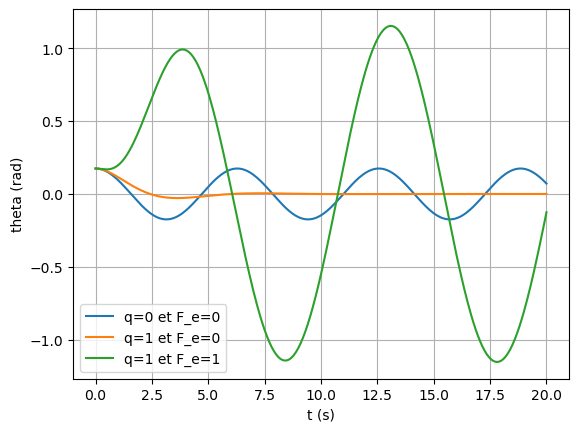

In [39]:
t, U_0_0 = rk4(ti, tf, step, u_ini, derivee_u, ordre, 0, 0)
t, U_1_0 = rk4(ti, tf, step, u_ini, derivee_u, ordre, 1, 0)
t, U_1_1 = rk4(ti, tf, step, u_ini, derivee_u, ordre, 1, 1)

# Plot
plt.plot(t, U_0_0[0], label="q=0 et F_e=0")
plt.plot(t, U_1_0[0], label="q=1 et F_e=0")
plt.plot(t, U_1_1[0], label="q=1 et F_e=1")

plt.xlabel("t (s)")
plt.ylabel("theta (rad)")
plt.grid()
plt.legend()
plt.show()

L'égalité des valeurs de $q$ et de $F_e$ semble donner plus d'amplitude à l'oscillation. En effet, si les valeurs de $q$ et de $F_e$ sont différents alors la faible amplitude s'atténue très rapiment. Les deux autres cas donnent des oscillations sinusoïdales.

## Mouvement chaotique

Lorsque l'on ne fait plus l'hypothèse des petits angles ($\sin\theta\approx\theta$), on obtient une équation différentielle d'ordre 2 qui n'est pas linéaire :
$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\sin\theta=F_e\sin(\Omega_e t) $$

Pour certaines valeurs des paramètres physiques, le comportement du pendule sera chaotique. Afin d'illustrer ce comportement, on se placera dans les conditions suivantes : $\theta(t=0)=10\mathrm{~°}$ (à convertir en radians) et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$. 

Résolvez l'équation du mouvement non-linéaire avec la méthode RK4 pour les valeurs suivantes de l'amplitude d'excitation : $F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.


In [40]:
#Paramètres
F_e=[1.4, 1.44, 1.465, 1.5] #rad.s-2

In [41]:
def derivee_u (u, t, q, F_e):
    '''
        Soit u = (u0, u1)
        Équation d'évolution du pendule : d(u0, u1)/dt = (u1, -q*u1+ Omega**2*u0)
    '''
    # Initialisation de la dérivée
    du = np.empty(u.shape)

    # Dérivée de la vitesse
    du[0] = u[1]
    du[1] = -q*u[1] - Omega**2*np.sin(u[0]) + F_e*np.sin(Omega_e*t)

    return du

In [42]:
# Méthode rk4
def rk4(start, end, step, v_ini, derivee, ordre, q, F_e):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i], q, F_e)
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2, q, F_e)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2, q, F_e)
        d4 = derivee(v[:, i] + step * d3, t[i] + step, q, F_e)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

Tracez $\theta(t)$ sur un temps de $100\mathrm{~s}$.

Ajoutez deux tests `if` dans la boucle après l'appel à rk4 pour maintenir l'angle $\theta$ dans l'intervalle $[-\pi;\pi]$.

In [43]:
u_ini=np.array([theta_0, 0])
t1=np.linspace(0, 100, 401)

In [44]:
# Simulation des données
t, U_a = rk4(ti, tf, step, u_ini, derivee_u, ordre, 0.5, F_e[0])
t, U_b = rk4(ti, tf, step, u_ini, derivee_u, ordre, 0.5, F_e[1])
t, U_c = rk4(ti, tf, step, u_ini, derivee_u, ordre, 0.5, F_e[2])
t, U_d = rk4(ti, tf, step, u_ini, derivee_u, ordre, 0.5, F_e[3])

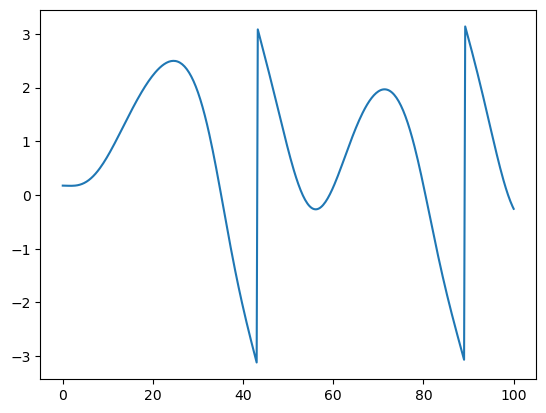

In [45]:
# U_a est une liste de 2 éléments : [liste_des_thetas, liste_des_theta_primes]
# U_a[0] contient tous les thetas, U_a[1] contient toutes les dérivées

# Angles theta
for j in range(len(U_a[0])):
    theta = U_a[0][j]
    # Application du modulo 2π
    U_a[0][j] = (theta + np.pi) % (2 * np.pi) - np.pi

# Tracé correct
plt.plot(t1, U_a[0], label=f"F_e={F_e[0]}")


In [46]:
Utotal=[U_a, U_b, U_c, U_d]

In [47]:
for j in range(len(U_b[0])):
    theta = U_b[0][j]
    # Application du modulo 2π
    U_b[0][j] = (theta + np.pi) % (2 * np.pi) - np.pi

for j in range(len(U_c[0])):
    theta = U_c[0][j]
    # Application du modulo 2π
    U_c[0][j] = (theta + np.pi) % (2 * np.pi) - np.pi

for j in range(len(U_d[0])):
    theta = U_d[0][j]
    # Application du modulo 2π
    U_d[0][j] = (theta + np.pi) % (2 * np.pi) - np.pi

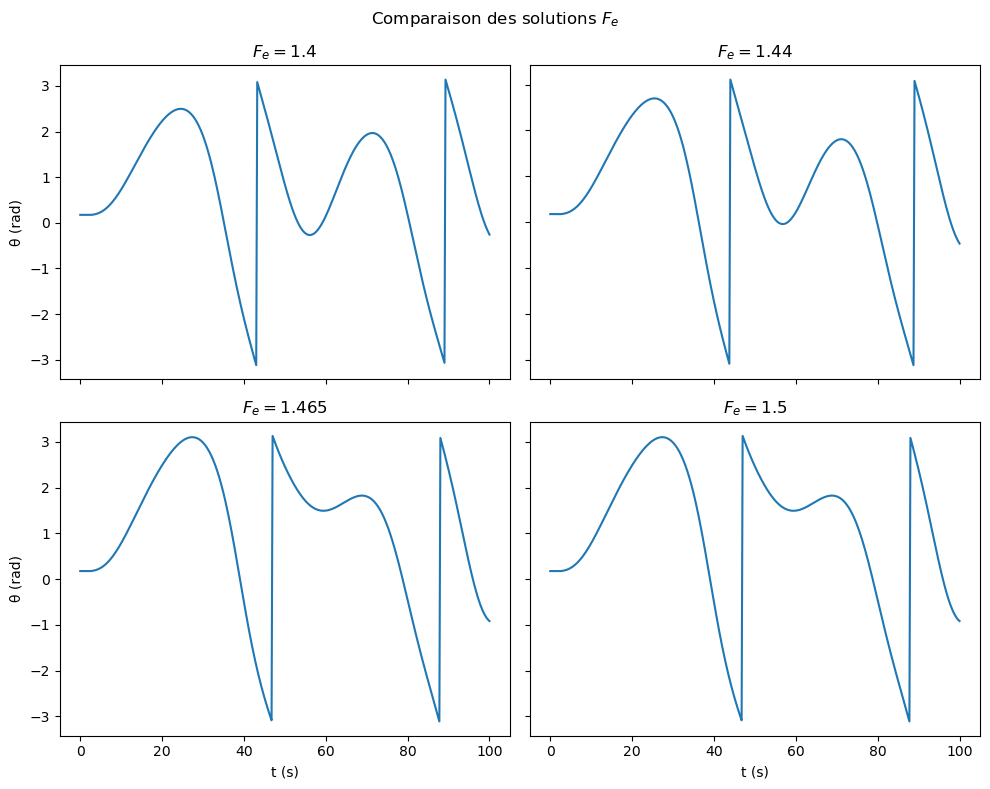

In [53]:
# Création de la figure et des subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Tracé de chacun dans un subplot différent
axs[0, 0].plot(t1, Utotal[0][0])
axs[0, 0].set_title(f"$F_e=${F_e[0]}")

axs[0, 1].plot(t1, Utotal[1][0])
axs[0, 1].set_title(f"$F_e=${F_e[1]}")

axs[1, 0].plot(t1, Utotal[3][0])
axs[1, 0].set_title(f"$F_e=${F_e[2]}")

axs[1, 1].plot(t1, Utotal[3][0])
axs[1, 1].set_title(f"$F_e=${F_e[3]}")

# Ajustement des paramètres communs
for ax in axs.flat:
    ax.set(xlabel='t (s)', ylabel='θ (rad)')
    ax.label_outer()  # Cache les labels redondants

# Ajout d'un titre
fig.suptitle('Comparaison des solutions $F_e$')

plt.tight_layout()
plt.show()


Que constatez-vous au sujet de la période du pendule ? (Attention, périodique $\neq$ sinusoïdal...)

La période de la pendule n'est pas visible dans son entièreté pendant 100 s, c'est très irrégulier et on ne reconnaît pas de motifs. On peut voir qu ec'est une oscillation par $\theta$ qui oscille entre $- \pi$ et $\pi$.

Dans le cas $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, calculez l'évolution de $\theta(t)$ pour deux conditions initiales très proches l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$. Tracez la valeur absolue de la différence entre les deux solutions en fonctions du temps en échelle semi-logarithmique.

In [49]:
# vecteur temps
# Paramètres
ti = 0    # s
tf = 100.0  # s
step = 0.5    # s

# Création du tableau temps
interval = tf - ti                     # Intervalle
num_points = 401      # Nombre d'éléments
t = np.linspace(ti, tf, num_points)    # Tableau temps t

# theta_0 = 10°
t, U_d = rk4(ti, tf, step, u_ini, derivee_u, ordre, 0.5, F_e[3])

In [50]:
# theta_0 = 9.999°

theta_b_0=np.radians(9.999)

u_ini_b=np.array([theta_b_0, 0])

In [51]:
t, U_e = rk4(ti, tf, step, u_ini_b, derivee_u, ordre, 0.5, F_e[3])

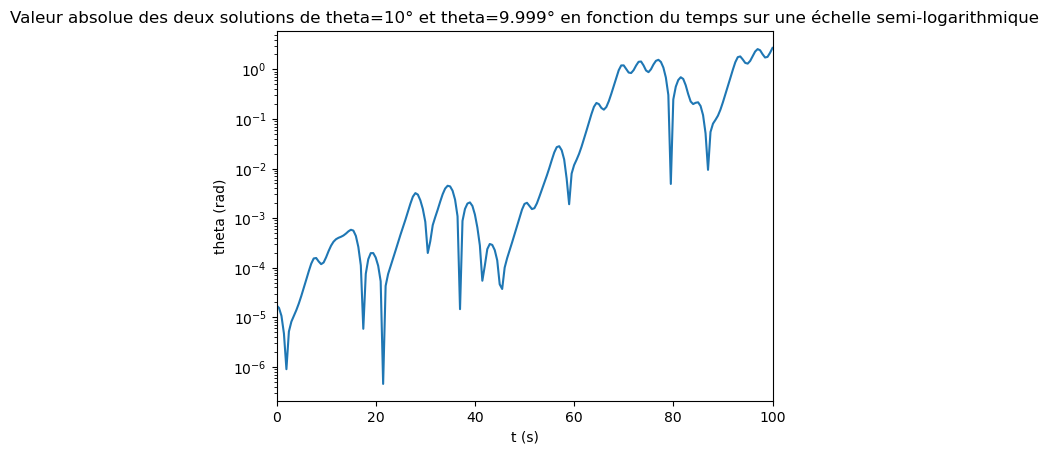

In [52]:
plt.semilogy(t, abs(U_d[0]-U_e[0]) + 1e-16)
plt.xlim(0, 100)
plt.xlabel("t (s)")
plt.ylabel("theta (rad)")
plt.title("Valeur absolue des deux solutions de theta=10° et theta=9.999° en fonction du temps sur une échelle semi-logarithmique")
plt.show()
